# Importing necessary libraries and functions

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib notebook

# Dataset

In [12]:
col_names = ['Number of O rings at risk on a given flight','No. of O-rings experiencing thermal distress','Launch Temp in F','Leak check pressure in psi','Temporal order of flight']
df = pd.read_csv("o-ring-erosion-or-blowby.data", names = col_names)
df.to_numpy()
df

,Number of O rings at risk on a given flight,No. of O-rings experiencing thermal distress,Launch Temp in F,Leak check pressure in psi,Temporal order of flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


# Preprocessing Data

<IPython.core.display.Javascript object>


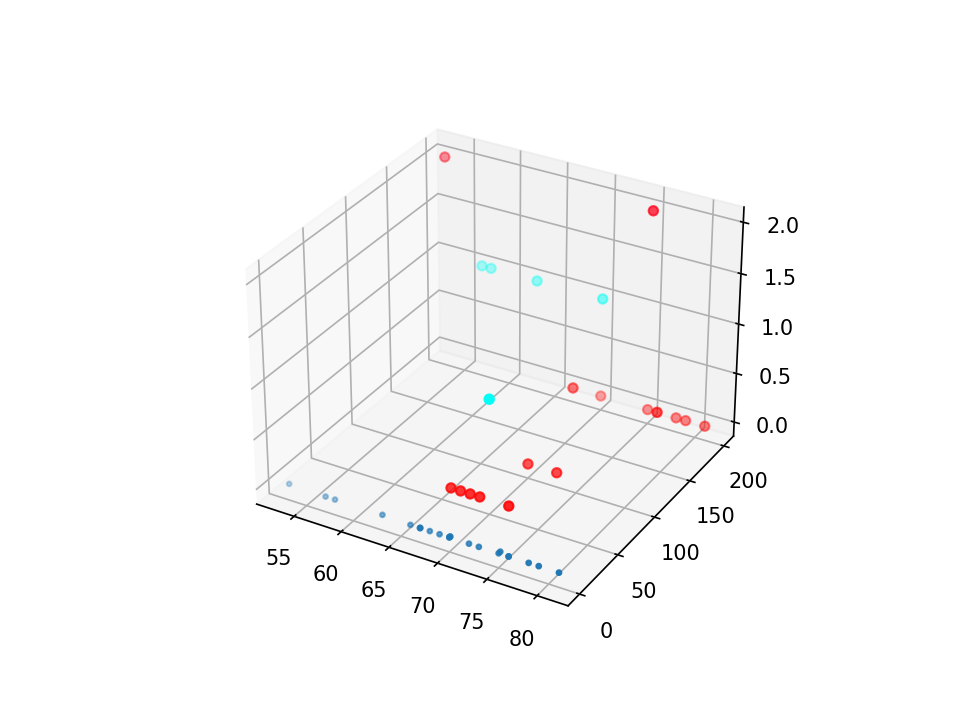

In [13]:
X = df[['Launch Temp in F']]
x = X.to_numpy()
Y = df[['Leak check pressure in psi']]
y = Y.to_numpy()
Z = df[['No. of O-rings experiencing thermal distress']]
z = Z.to_numpy()
fig = plt.figure()
ax1 = fig.add_subplot(111,projection = '3d')
ax1.scatter3D(x,y,z, c = z, cmap='hsv')

# Model Selection and Training
### Multivariate linear regression

In [14]:
regr = LinearRegression()
X1 = df[['Launch Temp in F','Leak check pressure in psi']]
regr.fit(X1,Z)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [3.32983072]
Coefficients: 
 [[-0.04867109  0.00293932]]


In [25]:
z_predicted = regr.predict(X1)

In [16]:
rmse = mean_squared_error(Z, z_predicted)
r2 = r2_score(Z, z_predicted)

In [17]:
print('Root mean squared error: ', rmse)
print('R2 score: ',r2)

Root mean squared error:  0.2660366560335355
R2 score:  0.3544339860470632


### Linearly regressing on Launch temperature

In [29]:
regression_model = LinearRegression()
regression_model.fit(X,Z)
Z_predicted = regression_model.predict(X)

<IPython.core.display.Javascript object>


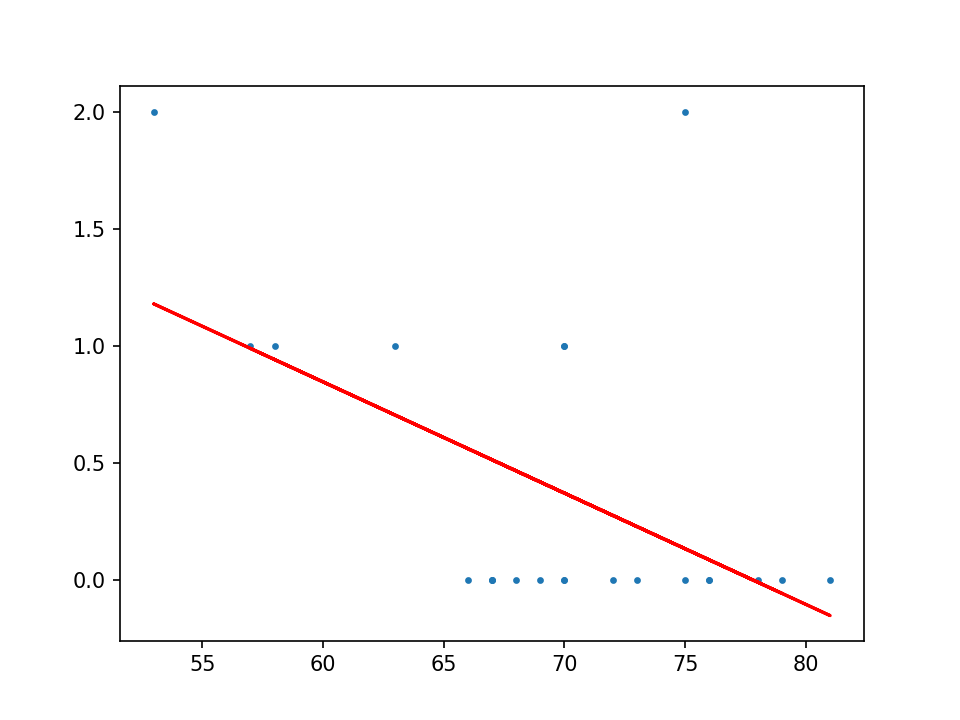

In [28]:
plt.scatter(X,Z,s = 5)
plt.plot(X, Z_predicted, color='r')

In [33]:
rmse = mean_squared_error(Z, Z_predicted)
r2 = r2_score(Z, Z_predicted)
print('Slope: ',regression_model.coef_)
print('Intercept: ', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ',r2)

Slope:  [[-0.04753968]]
Intercept:  [3.6984127]
Root mean squared error:  0.30443754313319527
R2 score:  0.26125018202999895


In [35]:
 # Launch temperature on Jan 28th 1986 in Cape Canaveral
lt = 31

#Number of O-Rings under the risk of failing according to our model
orr = lt*regression_model.coef_ + regression_model.intercept_ 

print(orr)

[[2.22468254]]
